In [3]:
# classification 
!pip install pandas
import pandas as pd
from __future__ import absolute_import,division, print_function,unicode_literals


import tensorflow as tf
# Load the dataset from a CSV file
df = pd.read_csv('IRIS.csv')

# Display the first few rows of the dataset
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
CSV_COLUMN_NAMES=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
SPECIES=['Iris-setosa','Iris-versicolor', 'Iris-virginica']


In [9]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

In [10]:
# about the data and the dataset

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
print(f"The number of Rows : {df.shape[0]}\nThe number of columns : {df.shape[1]}")

The number of Rows : 150
The number of columns : 5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# checking the null values 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

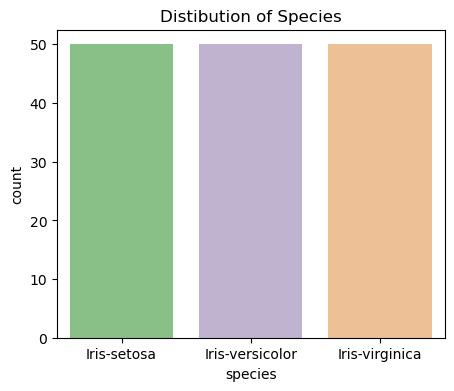

In [15]:
# exploring the differnt species
df.value_counts('species')
plt.figure(figsize = (5,4))
sns.countplot(x = 'species', data = df, palette = 'Accent')
plt.title('Distibution of Species');

In [19]:
df['species'].nunique()
setosa = df[df.species == 'Iris-setosa']
versicolor = df[df.species == 'Iris-versicolor']
virginica = df[df.species == 'Iris-virginica']

In [20]:
#describing each species 
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [21]:
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [22]:
virginica.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


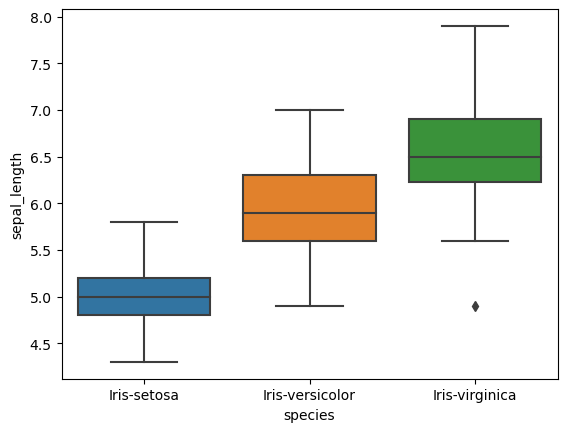

In [24]:
#generating box plot for each 
# this one is for sepal length
sns.boxplot(x = 'species', y = 'sepal_length', data = df);

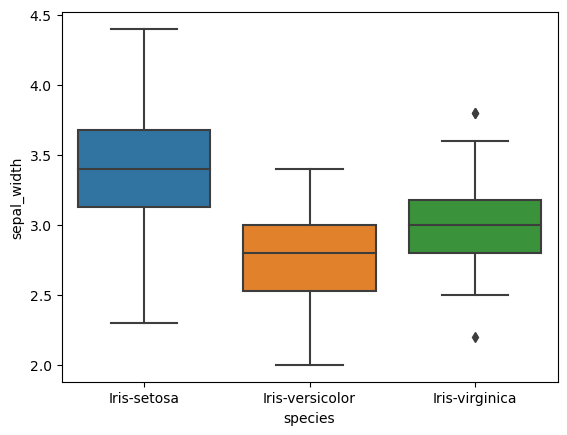

In [25]:
# box plot for all three species based on sepal width
sns.boxplot(x = 'species', y = 'sepal_width', data = df);


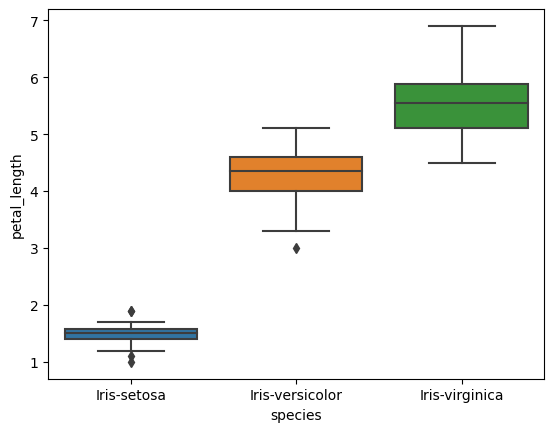

In [26]:
# box plot for all three species based on petal length 
sns.boxplot(x = 'species', y = 'petal_length', data = df);


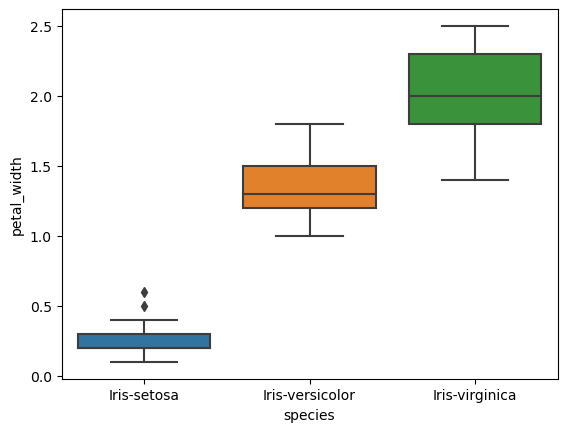

In [27]:
sns.boxplot(x = 'species', y = 'petal_width', data = df);


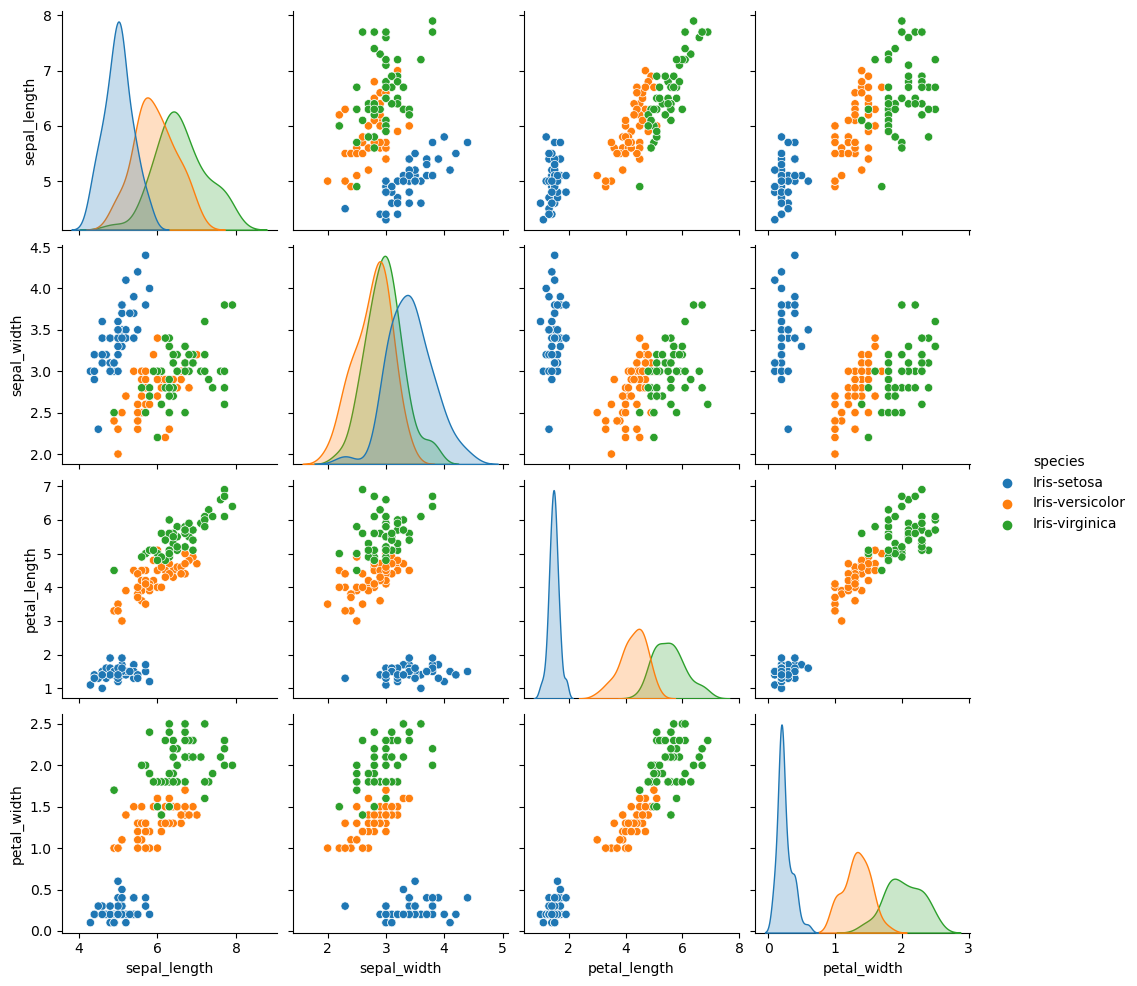

In [28]:
sns.pairplot(df, hue = 'species')
plt.show()

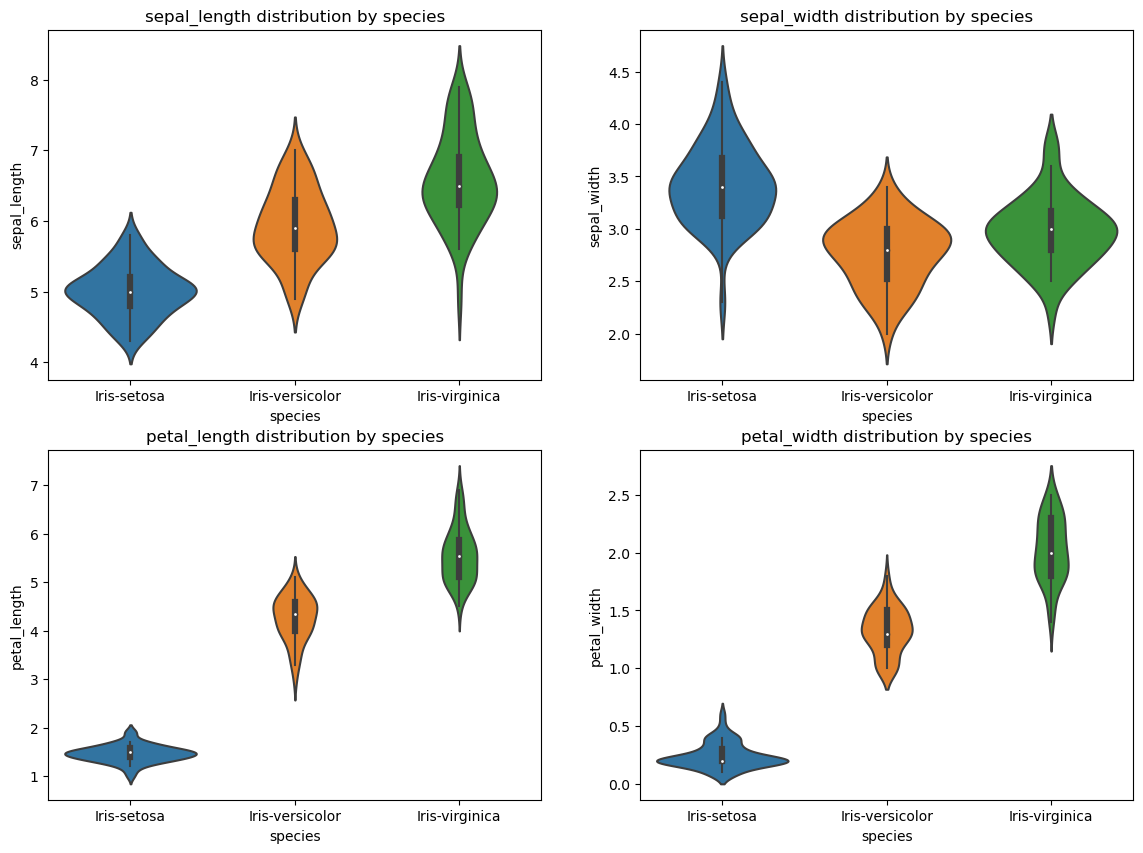

In [29]:
def violinPlot(y):
    sns.violinplot(data = df, x = 'species', y = y, inner="box")

    
plt.figure(figsize=(14, 10))    
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    violinPlot(column)
    plt.title(f'{column} distribution by species')
plt.show()

In [30]:
# import train_test_split to split the dataset into two parts for training and testing
from sklearn.model_selection import train_test_split

# remove species(target) column in input feature(X)
X = df.drop(['species'], axis=1)
# Output/Target (y)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [31]:
# import StandardScaler for Scaling
from sklearn.preprocessing import StandardScaler

cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()


,sepal_length,sepal_width,petal_length,petal_width
0,0.871108,-0.391723,0.460434,0.106720
1,0.393788,-0.391723,0.291639,0.106720
2,1.587087,-0.159016,1.135611,0.494792
3,-0.083531,-0.624430,0.741758,1.529650
4,0.513118,-1.322550,0.685493,0.882864


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

svc=SVC()
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.97


In [33]:
y_pred_train = svc.predict(X_train)
print(y_pred_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
